In [38]:
import pandas as pd
import quandl

In [39]:
# quandl.ApiConfig.api_key = "vvsxbSKmuqa_-pMxWRo8"
# df=quandl.get('WIKI/GOOGL')
# df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
# df['HL_PCT']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100
# df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100
# df=df[['Adj. Close','HL_PCT','PCT_change', 'Adj. Volume']]
# print(df.head())

# Day 3

In [40]:
# import math, datetime
# forecast_col= 'Adj. Close'
# df.fillna('-99999', inplace=True)
# forecast_out=int(math.ceil(0.01*len(df)))
# df['label']=df[forecast_col].shift(-forecast_out)

# Day 4

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.style import use
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
# from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import pickle
use('ggplot')

In [42]:
# X = np.array(df.drop(['label'],1),)
# X=scale(X)
# X = X[:-forecast_out]
# X_lately = X[-forecast_out:]
# df.dropna(inplace=True)
# y= np.array(df['label'])
# X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=1)
# #Very easy to switch algorithm

# # clf = SVR(kernel='poly')
# #n_jobs help with the number of theads/ like speeding up the processor
# clf=  LinearRegression(n_jobs=-1)
# clf.fit(X_train, y_train)

In [43]:
#pickle is used for serialization of python objects
# with open('70daysofMLlinearregression.pickle', 'wb') as f:
#     pickle.dump(clf,f)
pickle_in=open('70daysofMLlinearregression.pickle', 'rb')
clf=pickle.load(pickle_in)

In [44]:
accuracy= clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[ 1076.39473283  1090.92887671  1104.90135044  1099.5761428   1093.11899946
  1090.48493687  1088.88117518  1085.85412448  1079.7181094   1075.36215693
  1073.02130307  1092.43087358  1110.82109478  1115.35944879  1130.20284649
  1134.23039783  1132.89414915  1130.38319604  1132.17461569  1150.47391755
  1149.76360944  1159.71673174  1156.32444741  1164.05644197  1184.29981906
  1196.68543702  1191.06285901  1202.92866599  1208.46312557  1206.57985705
  1197.33987937  1202.88466602  1201.49621384  1137.17330411  1084.34518667] 0.976976632638 35


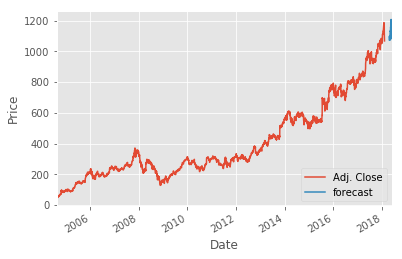

In [45]:
df['forecast']=np.nan
last_day=df.iloc[-1].name
last_unix= last_day.timestamp()
one_day=86400
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix +=one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()